# Supervised Learning Models

### Fiona Fang

# Part 1: Regression on California Test Scores



## 1. Find the url for the California Test Score Data Set

In [1]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read csv file
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")


In [4]:
# List first 5 records
df.head(5)


,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature

In [5]:
#Check types for all the columns
df.dtypes


rownames      int64
distcod       int64
county       object
district     object
grspan       object
enrltot       int64
teachers    float64
calwpct     float64
mealpct     float64
computer      int64
testscr     float64
compstu     float64
expnstu     float64
str         float64
avginc      float64
elpct       float64
readscr     float64
mathscr     float64
dtype: object

Univariate distribution of the target feature testscr:

Text(0, 0.5, 'Count')

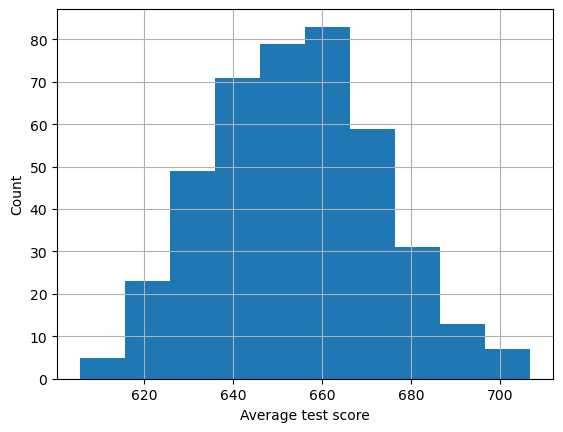

In [6]:
# Create a histogram using testscr column
from matplotlib import pyplot as plt

df['testscr'].hist()
plt.xlabel('Average test score')
plt.ylabel('Count')


Three continuous variables I choose are avginc, str, and mealpct.

The variable avginc measures the district average income.


Text(0, 0.5, 'Count')

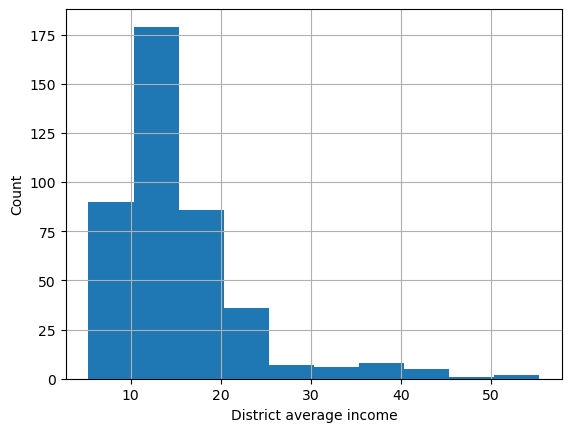

In [7]:
# Create a histogram using avginc column
df['avginc'].hist()
plt.xlabel('District average income')
plt.ylabel('Count')


The variable str measures the student teacher ratio.

Text(0, 0.5, 'Count')

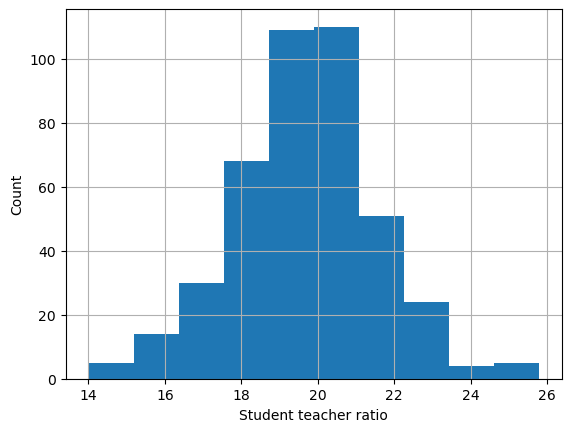

In [8]:
# Create a histogram using str column
df['str'].hist()
plt.xlabel('Student teacher ratio')
plt.ylabel('Count')


The variable mealpct measures the percent qualifying for reduced-price lunch.

Text(0, 0.5, 'Count')

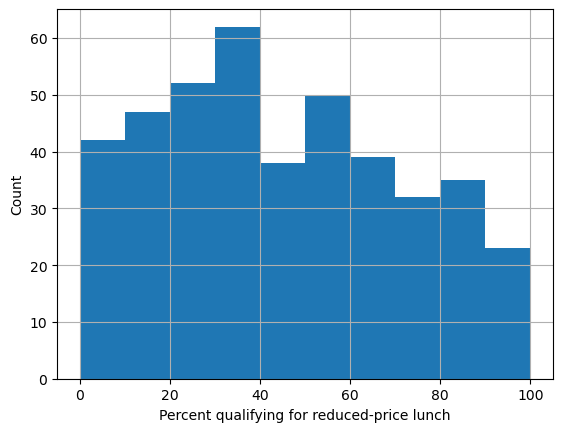

In [9]:
# Create a histogram using mealpct column
df['mealpct'].hist()
plt.xlabel('Percent qualifying for reduced-price lunch')
plt.ylabel('Count')


## 1.2 Visualize the dependency of the target on each feature from 1.1


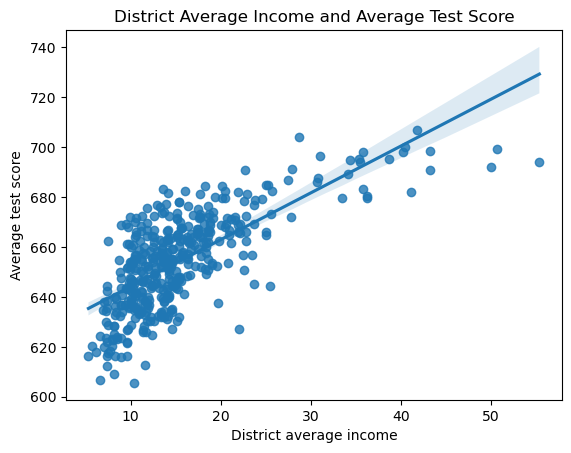

In [10]:
# Create a scatterplot using avginc and testscr column
sns.regplot(x='avginc', y='testscr', data=df)
plt.title("District Average Income and Average Test Score")
plt.xlabel("District average income")
plt.ylabel("Average test score")
plt.show()


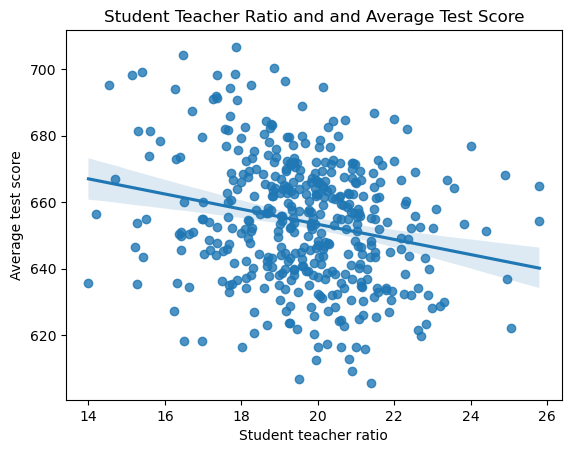

In [11]:
# Create a scatterplot using str and testscr column
sns.regplot(x='str', y='testscr', data=df)
plt.title("Student Teacher Ratio and and Average Test Score")
plt.xlabel("Student teacher ratio")
plt.ylabel("Average test score")
plt.show()


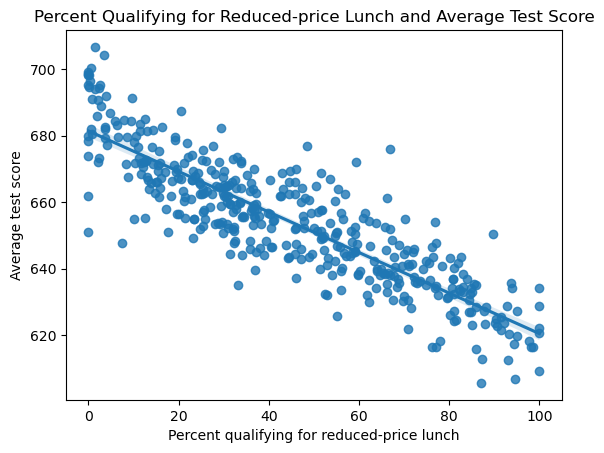

In [12]:
# Create a scatterplot using mealpct and testscr column
sns.regplot(x='mealpct', y='testscr', data=df)
plt.title("Percent Qualifying for Reduced-price Lunch and Average Test Score")
plt.xlabel("Percent qualifying for reduced-price lunch")
plt.ylabel("Average test score")
plt.show()


## 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [13]:
#Check types for all the columns
df.dtypes


rownames      int64
distcod       int64
county       object
district     object
grspan       object
enrltot       int64
teachers    float64
calwpct     float64
mealpct     float64
computer      int64
testscr     float64
compstu     float64
expnstu     float64
str         float64
avginc      float64
elpct       float64
readscr     float64
mathscr     float64
dtype: object

In [14]:
# Delete extra variable that is not continuous and is not used in the analysis
df = df.drop(['distcod','county','district','grspan','rownames'], axis=1)

# Delete readscr and mathscr variables because they are used to generate the dependent variable
df = df.drop(['readscr','mathscr'], axis=1)

df.head(5)


,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [15]:
# Change variable names to X, y to create train/test split
y = df['testscr']
X = df.loc[:, df.columns != 'testscr']

print(y[0:5])
X.head(5)


0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [16]:
# Train test split
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) with default parameters
# About default parameters: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, train_size=None, shuffle=True, random_state=None, stratify=None)

X_train.head(5)


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
324,576,31.000000,3.9931,28.125000,92,0.159722,4907.392578,18.580645,11.116000,9.548612
267,895,47.580002,17.5532,42.446800,70,0.078212,5408.781738,18.810423,14.180000,1.899441
178,223,11.500000,1.7544,17.543900,60,0.269058,4980.294434,19.391304,18.625999,0.000000
262,2325,115.300003,2.8817,15.655900,302,0.129892,4890.986816,20.164787,21.110500,22.709679
102,610,30.980000,8.5246,56.065601,144,0.236066,4704.043945,19.690123,11.283000,3.442623


In [17]:
# Scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### KNN for regression

#### Original train/test set for KNN:

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor()
knn1.fit(X_train, y_train)

#Print accuracy
print(knn1.score(X_test, y_test))
print("accuracy:{:.2f}".format(knn1.score(X_test, y_test)))

y_pred = knn1.predict(X_test)


0.039009661947919216
accuracy:0.04


In [19]:
# view predictions for test data
y_pred


array([651.31000977, 668.29002686, 652.45998535, 659.44001465,
       641.53000488, 657.62998047, 674.64998779, 645.53000488,
       664.79001465, 654.58001709, 654.32999268, 664.65001221,
       658.19998779, 650.29000244, 659.56999512, 637.02000732,
       661.80998535, 641.52000732, 648.45001221, 654.10997314,
       655.24998779, 650.33000488, 639.63000488, 648.29001465,
       646.31000977, 652.88999023, 661.65001221, 649.10001221,
       648.81998291, 650.98999023, 661.32999268, 661.34000244,
       667.81999512, 665.05999756, 647.35001221, 662.35998535,
       642.80001221, 653.70998535, 662.95998535, 664.23000488,
       651.38000488, 649.24998779, 629.61002197, 652.87000732,
       638.25998535, 665.47000732, 683.99998779, 665.47000732,
       644.88000488, 663.57999268, 662.97000732, 647.07999268,
       643.23999023, 659.29001465, 652.07999268, 651.97999268,
       647.91998291, 671.55998535, 650.59000244, 641.59000244,
       658.68999023, 657.51999512, 645.85999756, 654.84

In [20]:
# Use cross validation for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold1 = KFold()
print("KFold: "+str(cross_val_score(knn1, X_train, y_train, cv=kfold1).mean()))


KFold: -0.034750207071798524


#### After scaling the data:

In [21]:
knn2 = KNeighborsRegressor()
knn2.fit(X_train_scaled, y_train)

print(knn2.score(X_test_scaled, y_test))
print("accuracy:{:.2f}".format(knn2.score(X_test_scaled, y_test)))

y_pred = knn2.predict(X_test_scaled)


0.7079141577706027
accuracy:0.71


In [22]:
kfold2 = KFold()
print("KFold: "+str(cross_val_score(knn2, X_train_scaled, y_train, cv=kfold2).mean()))


KFold: 0.7480877791353759


Here KNN for regression, scaling the data with the StandardScaler influences the result. The cross validation score has increased from -0.035 to 0.748, indicating an improvement in performance after scaling the data.

### Linear Regression (OLS)

#### Original train/test set:

In [23]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr1.score(X_test, y_test)))
print("Cross validation Accuracy:{:.3f}".format(np.mean(cross_val_score(lr1, X_train, y_train, cv=10, scoring="r2"))))


Training set score: 0.821
Test set score: 0.767
Cross validation Accuracy:0.789


#### After scaling the data:

In [24]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(lr2.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(lr2.score(X_test_scaled, y_test)))
print("Cross validation Accuracy:{:.3f}".format(np.mean(cross_val_score(lr2, X_train_scaled, y_train, cv=10, scoring="r2"))))


Training set score: 0.821
Test set score: 0.767
Cross validation Accuracy:0.789


Here for linear regression, scaling the data with the StandardScaler does not influence the result. The cross validation score remains the same after scaling the data.

### Ridge

#### Original train/test set:

In [25]:
from sklearn.linear_model import Ridge

ridge1 = Ridge().fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge1.score(X_test, y_test)))

kfold3 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(ridge1, X_train, y_train, cv=kfold3))))


Training set score: 0.821
Test set score: 0.766
Cross validation Accuracy:0.804


#### After scaling the data:

In [26]:
ridge2 = Ridge().fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(ridge2.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(ridge2.score(X_test_scaled, y_test)))

kfold4 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(ridge2, X_train_scaled, y_train, cv=kfold4))))


Training set score: 0.821
Test set score: 0.768
Cross validation Accuracy:0.805


Here for ridge regression, scaling the data with the StandardScaler influences the result, but the influence is very little. The cross validation score increases from 0.804 to 0.805. The test set score increases from 0.766 to 0.768 with the training set score remaining same.

### Lasso

#### Original train/test set:

In [35]:
from sklearn.linear_model import Lasso

lasso1 = Lasso().fit(X_train, y_train)

print("Training set score: {:.3f}".format(lasso1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso1.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1.coef_ != 0)))

print("lasso.coef_: {}".format(lasso1.coef_))


Training set score: 0.821
Test set score: 0.766
Number of features used: 8
lasso.coef_: [-0.00071534  0.00160193 -0.09468978 -0.37588176  0.00479737  0.
  0.00265782  0.          0.58421184 -0.20452036]


In [37]:
kfold5 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(cross_val_score(lasso1, X_train, y_train, cv=kfold5))))


Cross validation Accuracy:0.806


#### After scaling the data:

In [42]:
lasso2 = Lasso().fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(lasso2.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(lasso2.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso2.coef_ != 0)))

print("lasso.coef_: {}".format(lasso2.coef_))


Training set score: 0.813
Test set score: 0.775
Number of features used: 6
lasso.coef_: [ -0.          -0.          -0.15379516 -10.3931787   -0.
   0.38904523   0.70241341  -0.           4.39502989  -3.10579116]


In [43]:
kfold6 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(cross_val_score(lasso2, X_train_scaled, y_train, cv=kfold6))))


Cross validation Accuracy:0.800


Here for lasso regression, scaling the data with the StandardScaler influences the result, but the influence is very small. The cross validation score decreases from 0.806 to 0.800. The test set score increases from 0.766 to 0.775.

In conclusion, for KNN, scaling the data with the StandardScaler helps increase the cross validation score.

For linear regression, scaling the data with the StandardScaler does not influence the result.

For ridge regression and lasso regression, scaling the data with the StandardScaler has some influence, but the influence is very little. 

## 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

### KNN for regression

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))


best mean cross-validation score: 0.742
best parameters: {'n_neighbors': 13}
test-set score: 0.725


In [55]:
knn3 = KNeighborsRegressor(n_neighbors=13)
knn3.fit(X_train_scaled, y_train)

print(knn3.score(X_test_scaled, y_test))


0.7248460234637262


In [56]:
kfold7 = KFold()
print("KFold: "+str(cross_val_score(KNeighborsRegressor(n_neighbors=13), X_train_scaled, y_train, cv=kfold7).mean()))


KFold: 0.7486476582595673


For KNN, after using GridSearchCV to tune the parameter, the cross validation score does not improve a lot. The cross validation score increases from 0.748 to 0.749.

### Linear Regression (OLS)

Linear regression does not have tunable parameters.

### Ridge

In [57]:
param_grid2 = {'alpha': [0.1,1,10,50,100]  }

grid2 = GridSearchCV(Ridge(), param_grid=param_grid2, cv=10)

grid2.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))
print("test-set score: {:.3f}".format(grid2.score(X_test_scaled, y_test)))


best mean cross-validation score: 0.792
best parameters: {'alpha': 10}
test-set score: 0.768


In [58]:
ridge3 = Ridge(alpha=10).fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(ridge3.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(ridge3.score(X_test_scaled, y_test)))

print("ridge.coef_: {}".format(ridge3.coef_))


Training set score: 0.821
Test set score: 0.768
ridge.coef_: [-0.786458   -0.26149266 -1.59397782 -8.84878611  0.89340405  0.67962592
  1.43696418 -0.03532179  4.89255227 -4.19122793]


In [59]:
kfold8 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(Ridge(alpha=10), X_train_scaled, y_train, cv=kfold8))))


Cross validation Accuracy:0.806


For ridge regression, after using GridSearchCV to tune the parameter, the cross validation score does not improve a lot. The cross validation score increases from 0.805 to 0.806.

### Lasso

In [60]:
param_grid3 = {'alpha': [0.1,1,10,50,100] }

grid3 = GridSearchCV(Lasso(), param_grid=param_grid3, cv=10)

grid3.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))
print("test-set score: {:.3f}".format(grid3.score(X_test_scaled, y_test)))


best mean cross-validation score: 0.792
best parameters: {'alpha': 0.1}
test-set score: 0.770


In [61]:
lasso = Lasso(alpha=0.1).fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(lasso.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("lasso.coef_: {}".format(lasso.coef_))


Training set score: 0.821
Test set score: 0.770
Number of features used: 7
lasso.coef_: [-0.18265505 -0.         -1.03490901 -9.84015481  0.          0.80292107
  1.38826014 -0.          4.72571811 -3.79707283]


In [62]:
kfold9 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(Lasso(alpha=0.1), X_train_scaled, y_train, cv=kfold9))))


Cross validation Accuracy:0.805


For lasso regression, after using GridSearchCV to tune the parameter, the cross validation score does not improve a lot. The cross validation score increases from 0.800 to 0.805.

In conclusion, after using GridSearchCV to tune the parameter, the results do not improve a lot for KNN, ridge regression, and lasso regression.

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

The best two model are the scaled ridge model with the tuned parameter and the scaled lasso model with the tuned paramter. 

In [65]:
ridge_best = Ridge(alpha=10)
ridge_best.fit(X_train_scaled, y_train)
print("Ridge.coef_: {}".format(ridge_best.coef_))

lasso_best = Lasso(alpha=0.1)
lasso_best.fit(X_train_scaled, y_train)
print("Lasso.coef_: {}".format(lasso_best.coef_))


Ridge.coef_: [-0.786458   -0.26149266 -1.59397782 -8.84878611  0.89340405  0.67962592
  1.43696418 -0.03532179  4.89255227 -4.19122793]
Lasso.coef_: [-0.18265505 -0.         -1.03490901 -9.84015481  0.          0.80292107
  1.38826014 -0.          4.72571811 -3.79707283]


In [66]:
coefficients = pd.DataFrame({'Ridge': ridge_best.coef_,'Lasso': lasso_best.coef_})
coefficients.sort_values('Lasso', ascending = False)


,Ridge,Lasso
8,4.892552,4.725718
6,1.436964,1.388260
5,0.679626,0.802921
1,-0.261493,-0.000000
4,0.893404,0.000000
7,-0.035322,-0.000000
0,-0.786458,-0.182655
2,-1.593978,-1.034909
9,-4.191228,-3.797073
3,-8.848786,-9.840155


Important Features for Both Ridge and Lasso:
1. Feature at index 3 is consistently important, with a negative coefficient around -8.85 (Ridge) and -9.84 (Lasso).
2. Feature at index 9 is consistently important, with a negative coefficient around -4.19 (Ridge) and -3.80 (Lasso).
3. Feature at index 8 is consistently important, with a positive coefficient around 4.89 (Ridge) and 4.73 (Lasso).

Consistent Plus-Minus Signs: Features at indices 0, 2, 5, and 6 have consistent signs in both Ridge and Lasso, suggesting their importance in a similar direction.

Differences Between Ridge and Lasso: Features at indices 1, 4, and 7 have non-zero coefficients in Ridge, but Lasso assigns them coefficients of 0. This indicates that, according to Lasso, these features may not be contributing significantly to the prediction.

## 1.6 Now that you have experimented with different models, discuss which final model you would choose to predict new data

Both Ridge and Lasso perform better than other models. Ridge tends to produce larger magnitude coefficients, while Lasso tends to drive some coefficients exactly to zero, indicating features that are not contributing to the model. I prefer Lasso to figure out many features are not relevant, and then I can have a simpler model to predict new data. 
Using Lasso probably can help prevent overfitting.


# Part 2: Classification on red and white wine characteristics

In [67]:
#Read csv file
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')


In [68]:
# Add "winetype" column and label values
white['winetype'] = 0  # 0 for white wine
red['winetype'] = 1    # 1 for red wine


In [69]:
# Combine both datasets into a single DataFrame
wine = pd.concat([white, red], ignore_index=True)
wine.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature

Univariate distribution of the target feature winetype:

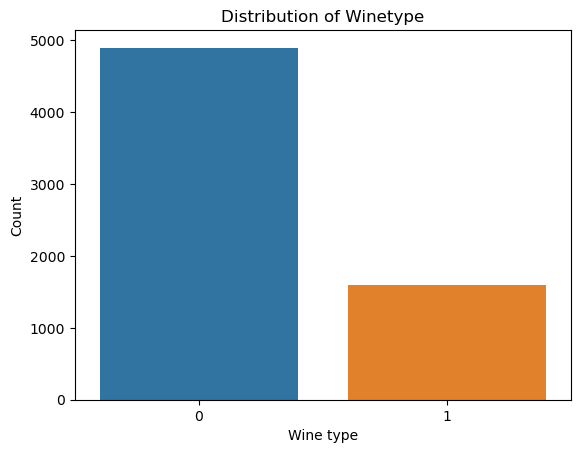

In [70]:
# Create a countplot using winetype column
sns.countplot(x='winetype', data=wine)
plt.title('Distribution of Winetype')
plt.xlabel('Wine type')
plt.ylabel('Count')
plt.show()


Three continuous variables I choose are density, pH, and alcohol.

Text(0, 0.5, 'Count')

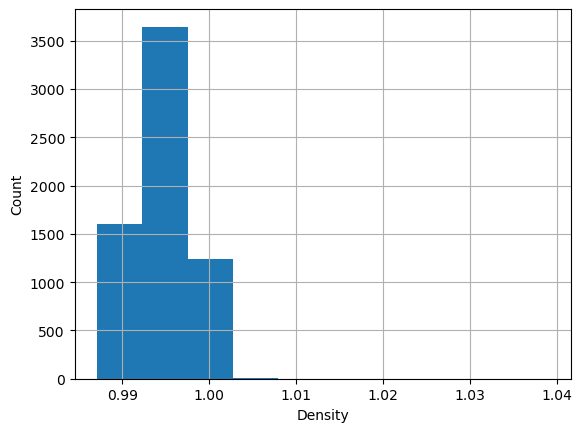

In [71]:
# Create a histogram using density column
wine['density'].hist()
plt.xlabel('Density')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

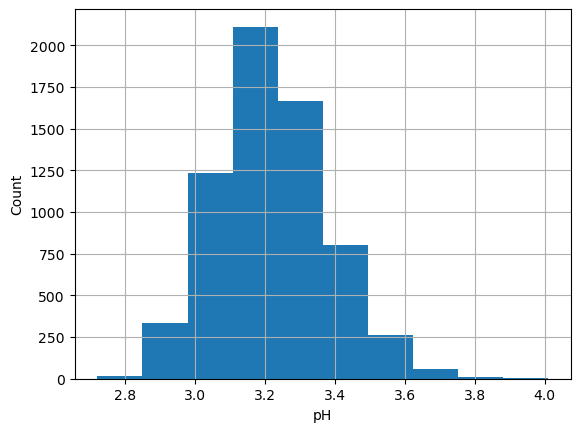

In [72]:
# Create a histogram using pH column
wine['pH'].hist()
plt.xlabel('pH')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

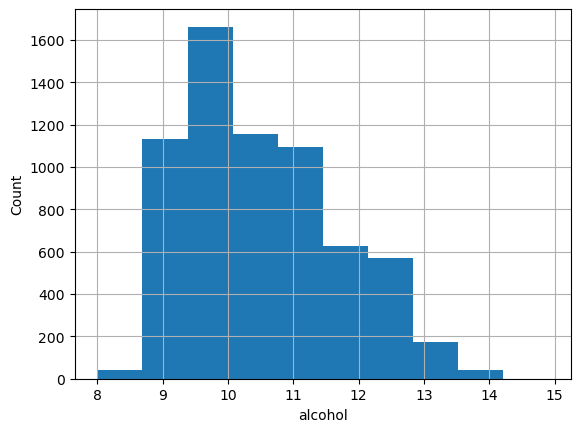

In [73]:
# Create a histogram using alcohol column
wine['alcohol'].hist()
plt.xlabel('alcohol')
plt.ylabel('Count')


## 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [74]:
#Check types for all the columns
wine.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
winetype                  int64
dtype: object

In [75]:
# Change variable names to X, y to create train/test split
y2 = wine['winetype']
X2 = wine.loc[:, wine.columns != 'winetype']

print(y2[0:5])
X2.head()


0    0
1    0
2    0
3    0
4    0
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [78]:
# Train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)
X_train2.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2482,6.2,0.260,0.37,7.1,0.047,54.0,201.0,0.99523,3.19,0.48,9.5,6
4211,7.1,0.380,0.42,11.8,0.041,32.0,193.0,0.99624,3.04,0.49,10.0,6
6475,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6
6180,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6
961,8.0,0.420,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7


In [79]:
# Scale the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train2)
X_train_scaled2 = scaler.transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)


### Logistic Regression

#### Original train/test set:

In [80]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None).fit(X_train2, y_train2)

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(logreg.score(X_test2, y_test2)))

predicted_vals = logreg.predict(X_test2) 
print("logreg.predict: {}".format(predicted_vals))


logreg.coef_: [[ 0.77140436 12.16309334 -2.09072415 -0.24349464  2.04613333  0.04293218
  -0.06946581 -2.65047997  0.63843613 10.38396239 -0.73274694  0.07714608]]
Training set score: 0.980
Test set score: 0.986
logreg.predict: [1 1 0 ... 0 0 0]


In [81]:
kfold10 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(LogisticRegression(penalty=None), X_train2, y_train2, cv=kfold10))))


Cross validation Accuracy:0.978


#### After scaling the data: 

In [82]:
logreg_scaled = LogisticRegression(penalty=None).fit(X_train_scaled2, y_train2)

print("logreg_scaled.coef_: {}".format(logreg_scaled.coef_))
print("Training set score: {:.3f}".format(logreg_scaled.score(X_train_scaled2, y_train2)))
print("Test set score: {:.3f}".format(logreg_scaled.score(X_test_scaled2, y_test2)))

predicted_vals_scaled = logreg_scaled.predict(X_test_scaled2) 
print("logreg_scaled.predict: {}".format(predicted_vals_scaled))


logreg_scaled.coef_: [[-0.21197303  1.22391767 -0.33211702 -4.2572119   0.7766404   0.80560988
  -2.77676398  4.74441375 -0.01493642  0.57542025  1.66202023  0.47207434]]
Training set score: 0.995
Test set score: 0.994
logreg_scaled.predict: [1 0 0 ... 0 0 0]


In [83]:
kfold11 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logreg_scaled, X_train_scaled2, y_train2, cv=kfold11))))


Cross validation Accuracy:0.993


Here for ridge regression, scaling the data with the StandardScaler influences the result. The cross validation score increases from 0.978 to 0.993. 

### Penalized Logistic Regression: L2

#### Original train/test set:

In [1]:
# Penalized Logistic Regression (L2 regularization)
logregl2 = LogisticRegression(penalty='l2').fit(X_train2, y_train2)

print("logregl2.coef_: {}".format(logregl2.coef_))
print("Training set score: {:.3f}".format(logregl2.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(logregl2.score(X_test2, y_test2)))

predicted_vals = logregl2.predict(X_test2) 
print("logregl2.predict: {}".format(predicted_vals))


NameError: name 'LogisticRegression' is not defined

In [85]:
kfold12 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(cross_val_score(logregl2, X_train2, y_train2, cv=kfold12))))


Cross validation Accuracy:0.976


#### After scaling the data:

In [86]:
logregl2_scaled = LogisticRegression(penalty='l2').fit(X_train_scaled2, y_train2)

print("logregl2_scaled.coef_: {}".format(logregl2_scaled.coef_))
print("Training set score: {:.3f}".format(logregl2_scaled.score(X_train_scaled2, y_train2)))
print("Test set score: {:.3f}".format(logregl2_scaled.score(X_test_scaled2, y_test2)))

predicted_vals = logregl2_scaled.predict(X_test_scaled2) 
print("logregl2_scaled.predict: {}".format(predicted_vals))


logregl2_scaled.coef_: [[ 0.35209301  1.29243333 -0.30791288 -3.04527972  0.83006207  0.52607095
  -2.61029808  3.30748053  0.39855616  0.71811103  1.02323689  0.38440997]]
Training set score: 0.994
Test set score: 0.994
logregl2_scaled.predict: [1 0 0 ... 0 0 0]


In [120]:
kfold13 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logregl2_scaled, X_train_scaled2, y_train2, cv=kfold13))))


Cross validation Accuracy:0.992


Here, scaling the data with the StandardScaler influences the result. The cross validation score increases from 0.976 to 0.992. 

### Penalized Logistic Regression: L1

#### Original train/test set:

In [89]:
logregl1 = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train2, y_train2)

print("logregl1.coef_: {}".format(logregl1.coef_))
print("Training set score: {:.3f}".format(logregl1.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(logregl1.score(X_test2, y_test2)))

predicted_vals = logregl1.predict(X_test2) 
print("logregl1.predict: {}".format(predicted_vals))


logregl1.coef_: [[ 0.74729971 10.75497434 -0.06834257 -0.14190043 16.88314591  0.03912598
  -0.06094323 -7.33673226  3.07719198  9.19175816 -0.57250143  0.02800052]]
Training set score: 0.984
Test set score: 0.992
logregl1.predict: [1 0 0 ... 0 0 0]


In [90]:
kfold14 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(cross_val_score(logregl1, X_train2, y_train2, cv=kfold14))))


Cross validation Accuracy:0.985


#### After scaling the data:

In [91]:
logregl1_scaled = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train_scaled2, y_train2)

print("logregl1_scaled.coef_: {}".format(logregl1_scaled.coef_))
print("Training set score: {:.3f}".format(logregl1_scaled.score(X_train_scaled2, y_train2)))
print("Test set score: {:.3f}".format(logregl1_scaled.score(X_test_scaled2, y_test2)))

predicted_vals = logregl1_scaled.predict(X_test_scaled2) 
print("logregl1_scaled.predict: {}".format(predicted_vals))


logregl1_scaled.coef_: [[ 0.          1.21531714 -0.30872634 -3.67824468  0.76661941  0.6373953
  -2.63927506  4.1473875   0.12959904  0.59551953  1.38686276  0.42680109]]
Training set score: 0.995
Test set score: 0.995
logregl1_scaled.predict: [1 0 0 ... 0 0 0]


In [92]:
kfold15 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logregl1_scaled, X_train_scaled2, y_train2, cv=kfold15))))


Cross validation Accuracy:0.993


Here, scaling the data with the StandardScaler influences the result. The cross validation score increases from 0.985 to 0.993.


### KNN for Classification

#### Original train/test set:

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

knn_wine = KNeighborsClassifier()
knn_wine.fit(X_train2, y_train2)

print(knn_wine.score(X_test2, y_test2))
print("accuracy:{:.3f}".format(knn_wine.score(X_test2, y_test2)))

y_pred = knn_wine.predict(X_test2)


0.9427692307692308
accuracy:0.943


In [94]:
skfold1 = StratifiedKFold()
print("StratifiedKFold: "+str(cross_val_score(knn_wine, X_train2, y_train2, cv=skfold1).mean()))


StratifiedKFold: 0.9408889590901911


#### After scaling the data:

In [95]:
knn_wine_scaled = KNeighborsClassifier()
knn_wine_scaled.fit(X_train_scaled2, y_train2)

print(knn_wine_scaled.score(X_test_scaled2, y_test2))
print("accuracy:{:.3f}".format(knn_wine_scaled.score(X_test_scaled2, y_test2)))

y_pred = knn_wine_scaled.predict(X_test_scaled2)



0.9932307692307693
accuracy:0.993


In [96]:
skfold2 = StratifiedKFold()
print("StratifiedKFold: "+str(cross_val_score(knn_wine_scaled, X_train_scaled2, y_train2, cv=skfold2).mean()))


StratifiedKFold: 0.9917898173011108


Scaling the data with StandardScaler influences the results. The cross validation score has increased from 0.941 to 0.992.

In conclusion, for logistic regression, penalized logistic regression, and KNN for classifier,  scaling the data with StandardScaler improves the results.

## 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

### Penalized Logistic Regression

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid4 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear']}

logreg = LogisticRegression()

grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid4, cv=10)

grid_search.fit(X_train_scaled2, y_train2)

best_params = grid_search.best_params_
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_test_scaled2, y_test2)



LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [99]:
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear']} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.995
best score: 0.993


In [100]:
logregl1_scaled = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train_scaled2, y_train2)

print("logregl1_scaled.coef_: {}".format(logregl1_scaled.coef_))
print("Training set score: {:.3f}".format(logregl1_scaled.score(X_train_scaled2, y_train2)))
print("Test set score: {:.3f}".format(logregl1_scaled.score(X_test_scaled2, y_test2)))

predicted_vals = logregl1_scaled.predict(X_test_scaled2) 
print("logregl1_scaled.predict: {}".format(predicted_vals))


logregl1_scaled.coef_: [[ 0.          1.21505147 -0.30870952 -3.6779694   0.76678295  0.63695818
  -2.6392919   4.14728255  0.1292645   0.59545588  1.38735059  0.42685264]]
Training set score: 0.995
Test set score: 0.995
logregl1_scaled.predict: [1 0 0 ... 0 0 0]


In [105]:
kfold16 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logregl1_scaled, X_train_scaled2, y_train2, cv=kfold16))))


Cross validation Accuracy:0.993


For penalized logistic regression, after using GridSearchCV to tune the parameter, the cross validation score remains the same (0.993 for L1 after scaling and here). 

### Logistic Regression

In [106]:
param_grid5 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid5)

grid_search.fit(X_train_scaled2, y_train2)

best_params = grid_search.best_params_
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_test_scaled2, y_test2)


LogisticRegression(C=0.001, penalty='none')

In [107]:
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 0.001, 'penalty': 'none'}
test-set score: 0.994
best score: 0.993


In [108]:
logreg_scaled = LogisticRegression(C=0.001,penalty=None).fit(X_train_scaled2, y_train2)

print("logreg_scaled.coef_: {}".format(logreg_scaled.coef_))
print("Training set score: {:.3f}".format(logreg_scaled.score(X_train_scaled2, y_train2)))
print("Test set score: {:.3f}".format(logreg_scaled.score(X_test_scaled2, y_test2)))

predicted_vals = logreg_scaled.predict(X_test_scaled2) 
print("logreg_scaled.predict: {}".format(predicted_vals))


logreg_scaled.coef_: [[-0.21197303  1.22391767 -0.33211702 -4.2572119   0.7766404   0.80560988
  -2.77676398  4.74441375 -0.01493642  0.57542025  1.66202023  0.47207434]]
Training set score: 0.995
Test set score: 0.994
logreg_scaled.predict: [1 0 0 ... 0 0 0]


In [109]:
kfold17 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logreg_scaled, X_train_scaled2, y_train2, cv=kfold17))))


Cross validation Accuracy:0.993


For logistic regression, after using GridSearchCV to tune the parameter, the cross validation score remains the same (0.993 after scaling and here).

### KNN for classification

In [110]:
np.arange(1, 15, 2)

param_grid6 = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid6, cv=10)
grid.fit(X_train_scaled2, y_train2)

print("best score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled2, y_test2)))


best score: 0.994
best parameters: {'n_neighbors': 3}
test-set score: 0.994


In [111]:
knn4 = KNeighborsClassifier(n_neighbors=3)
knn4.fit(X_train_scaled2, y_train2)

print(knn4.score(X_test_scaled2, y_test2))


0.9944615384615385


In [112]:
skfold2 = StratifiedKFold()
print("StratifiedKFold: "+str(cross_val_score(
    KNeighborsClassifier(n_neighbors=3), X_train_scaled2, y_train2, cv=skfold2).mean()))


StratifiedKFold: 0.9930207971357868


For KNN for classfier, after using GridSearchCV to tune the parameter, the cross validation score increases from 0.992 to 0.993. But the influence is very little.

In conclusion, using GridSearchCV did not lead to significant improvements in the performance of logistic regression, penalized logistic regression, and KNN for classification. After using GridSearchCV to tune the parameter, the results remain the same or do not improve a lot.

## 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

In [116]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("KFold:\n{}".format(
cross_val_score(KNeighborsClassifier(), X_train_scaled2, y_train2, cv=kfold)))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(), X_train_scaled2, y_train2, cv=skfold)))


KFold:
[0.99384615 0.98871795 0.99383984 0.98973306 0.99589322]
StratifiedKFold:
[0.99179487 0.99282051 0.98767967 0.99281314 0.99691992]


## When changing from 'stratified k-fold' to 'kfold'

### Penalized Logistic Regression

#### stratified k-fold:

In [117]:
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear']} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=skfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.995
best score: 0.993


#### kfold:

In [119]:
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear']} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=kfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.995
best score: 0.993


In penalized logistic regression, when changing from ‘stratified k-fold’ to ‘kfold’, the best parameter does not change. 

### Logistic Regression

#### stratified k-fold:

In [121]:
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=skfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.5f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.5f}".format(logreg_cv.best_score_))


best parameters: {'C': 0.001, 'penalty': 'none'}
test-set score: 0.99446
best score: 0.99323


#### kfold:

In [122]:
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=kfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.5f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.5f}".format(logreg_cv.best_score_))

best parameters: {'C': 0.001, 'penalty': 'none'}
test-set score: 0.99446
best score: 0.99323


In logistic regression, when changing from ‘stratified k-fold’ to ‘kfold’, the best parameter does not change. 

### KNN for Classification

#### stratified k-fold:

In [128]:
param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
grid.fit(X_train_scaled2, y_train2)

print("best score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled2, y_test2)))


best score: 0.993
best parameters: {'n_neighbors': 7}
test-set score: 0.994


#### kfold:

In [129]:
param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
grid.fit(X_train_scaled2, y_train2)

print("best score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled2, y_test2)))


best score: 0.994
best parameters: {'n_neighbors': 3}
test-set score: 0.994


In knn, when changing from ‘stratified k-fold’ to ‘kfold’, the best parameter changes from 7 to 3. 

## When changing the random state

In [130]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

print("KFold:\n{}".format(
cross_val_score(KNeighborsClassifier(), X_train_scaled2, y_train2, cv=kfold)))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(), X_train_scaled2, y_train2, cv=skfold)))


KFold:
[0.99179487 0.99692308 0.98973306 0.99281314 0.99281314]
StratifiedKFold:
[0.99487179 0.99589744 0.98870637 0.99486653 0.99281314]


### Penalized Logistic Regression

In [133]:
# skfold for different random state
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear']} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=skfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.995
best score: 0.993


In [134]:
# kfold for different random state
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'solver': ['liblinear']} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=kfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.995
best score: 0.993


In penalized logistic regression, compared with the last section of analysis, when changing the random state (from 42 to 5) in stratified kfold, the parameter for C changes from 1 to 10, and the penalty remains the same. When changing the random state in kfold, the parameter is still 1, and the penalty remains the same.

### Logistic Regression

In [135]:
# skfold for different random state
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=skfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 0.001, 'penalty': 'none'}
test-set score: 0.994
best score: 0.993


In [136]:
# kfold for different random state
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=kfold)
logreg_cv.fit(X_train_scaled2,y_train2)

print("best parameters: {}".format(logreg_cv.best_params_))
print("test-set score: {:.3f}".format(logreg_cv.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(logreg_cv.best_score_))


best parameters: {'C': 0.001, 'penalty': 'none'}
test-set score: 0.994
best score: 0.992


In logistic regression, when changing the random state in both stratified kfold and kfold, the parameter remains the same. 

### KNN for Classification

In [137]:
# skfold for different random state
param_grid = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
grid.fit(X_train_scaled2, y_train2)

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(grid.best_score_))


best parameters: {'n_neighbors': 1}
test-set score: 0.994
best score: 0.994


In [138]:
# kfold for different random state
param_grid = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
grid.fit(X_train_scaled2, y_train2)

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled2, y_test2)))
print("best score: {:.3f}".format(grid.best_score_))


best parameters: {'n_neighbors': 1}
test-set score: 0.994
best score: 0.993


In KNN, when changing the random state (from 42 to 5) in stratified kfold, the parameter changes from 7 to 1. When changing the random state (from 42 to 5) in kfold, the parameter changes from 3 to 1. 

For random_state=5 in both stratified kfold and kfold, the best parameter are the same. Both are 1. 


## 2.5 Lastly, discuss which final model you would choose to predict new data

Based on the previous analysis, the model with relatively better cross validation score are: 


In [167]:
# Penalized logistic regression model with scaled data and tuned paramter, and random_state=42 

kfold_p_logreg = KFold(n_splits=5, shuffle=True, random_state=42)

print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(LogisticRegression(C=1,penalty='l1', solver='liblinear'), X_train_scaled2, y_train2, cv=kfold_p_logreg))))



Cross validation Accuracy:0.993


In [168]:
# Logistic regression model with with scaled data, tuned paramter, and random_state=42 

kfold_logreg1 = KFold(n_splits=5, shuffle=True, random_state=42)
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(LogisticRegression(C=0.001,penalty=None), X_train_scaled2, y_train2, cv=kfold_logreg1))))

kfold_logreg2 = KFold(n_splits=5, shuffle=True, random_state=5)
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(LogisticRegression(C=0.001,penalty=None), X_train_scaled2, y_train2, cv=kfold_logreg2))))

Cross validation Accuracy:0.993
Cross validation Accuracy:0.992


In [169]:
logreg_best=LogisticRegression(C=0.001,penalty=None).fit(X_train_scaled2, y_train2)
logreg_best.fit(X_train_scaled2, y_train2)
print("logistic.coef_: {}".format(logreg_best.coef_))

p_logreg_best=LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train_scaled2, y_train2)
p_logreg_best.fit(X_train_scaled2, y_train2)
print("penalized.coef_: {}".format(p_logreg_best.coef_))


logistic.coef_: [[-0.21197303  1.22391767 -0.33211702 -4.2572119   0.7766404   0.80560988
  -2.77676398  4.74441375 -0.01493642  0.57542025  1.66202023  0.47207434]]
penalized.coef_: [[ 0.          1.21539468 -0.30859097 -3.67832061  0.76661856  0.63684243
  -2.6387897   4.14821968  0.12938699  0.59529607  1.3869101   0.42762883]]


In [170]:
coefficients = pd.DataFrame({'Logistic Regression': logreg_best.coef_.ravel(),
                             'Penalized Logistic Regression': p_logreg_best.coef_.ravel()})
coefficients.sort_values('Penalized Logistic Regression', ascending = False)


,Logistic Regression,Penalized Logistic Regression
7,4.744414,4.148220
10,1.662020,1.386910
1,1.223918,1.215395
4,0.776640,0.766619
5,0.805610,0.636842
9,0.575420,0.595296
11,0.472074,0.427629
8,-0.014936,0.129387
0,-0.211973,0.000000
2,-0.332117,-0.308591


In this case, both the Logistic Regression and Penalized Logistic Regression models seem to have similar performance in terms of the absolute values of coefficients for the features.

For both models:
1. Features 7, 10, 1, 4, and 5 have positive coefficients, suggesting a positive impact on the target variable.
2. Features 6 and 3 have negative coefficients, suggesting a negative impact on the target variable.
3. Features 8 and 0 have very small coefficients, indicating a weaker impact. In the Penalized Logistic Regression, the coefficient for feature 0 is zero, suggesting a potentially less important role.


I will choose Penalized Logistic Regression with L1 regularization, because I want a more potentially simpler model. It can help push the coefficients of less important features to exactly zero.

